# Problem 2

## 1. Theoretical Foundation

### Differential Equation

The differential equation governing the motion of a forced damped pendulum is:

$\frac{d^2\theta}{dt^2} + b\frac{d\theta}{dt} + \frac{g}{L}\sin(\theta) = A\cos(\omega t)$

Where:

* $\theta$ is the angular displacement.
* $b$ is the damping coefficient.
* $g$ is the acceleration due to gravity.
* $L$ is the length of the pendulum.
* $A$ is the driving amplitude.
* $\omega$ is the driving frequency.

### Small-Angle Approximation

For small angles, $\sin(\theta) \approx \theta$. The equation simplifies to:

$\frac{d^2\theta}{dt^2} + b\frac{d\theta}{dt} + \frac{g}{L}\theta = A\cos(\omega t)$

### Approximate Solutions

The general solution is the sum of the homogeneous (transient) and particular (steady-state) solutions.

### Resonance Conditions

Resonance occurs when $\omega \approx \sqrt{g/L}$, leading to maximum amplitude oscillations.

## 2. Analysis of Dynamics

* **Damping Coefficient (b):** Influences the rate of decay of oscillations.
* **Driving Amplitude (A):** Affects the amplitude of oscillations and can lead to nonlinear behavior.
* **Driving Frequency (ω):** Determines the system's response; resonance occurs when $\omega$ is close to the natural frequency.
* **Transition to Chaos:** Can be observed through phase portraits, Poincaré sections, and bifurcation diagrams.

## 3. Practical Applications

* Energy harvesting devices
* Suspension bridges
* Oscillating circuits
* Metronomes
* Various mechanical systems

## 4. Implementation



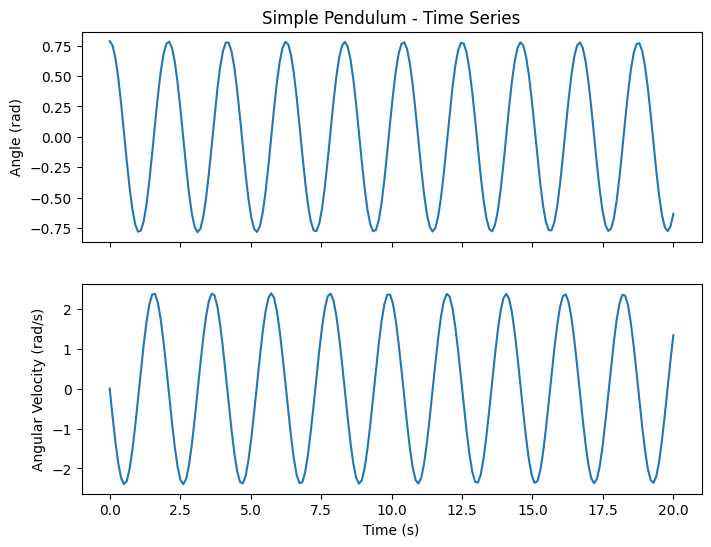

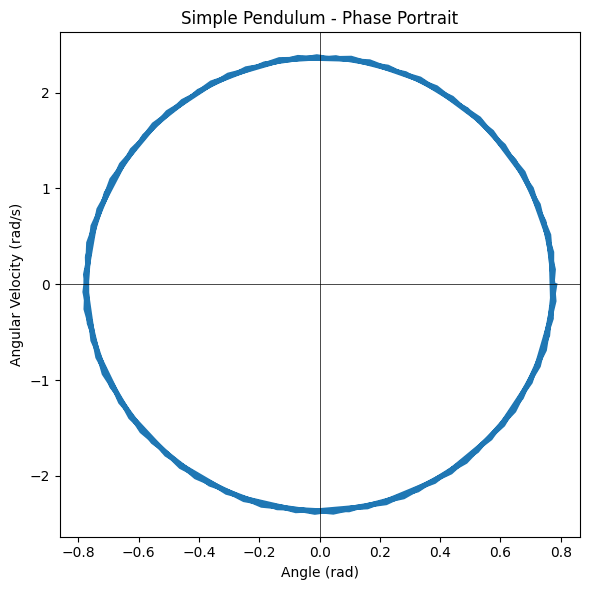

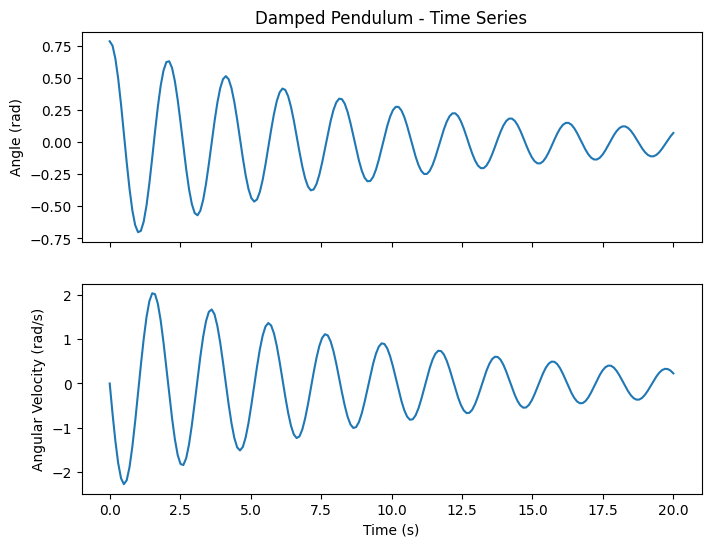

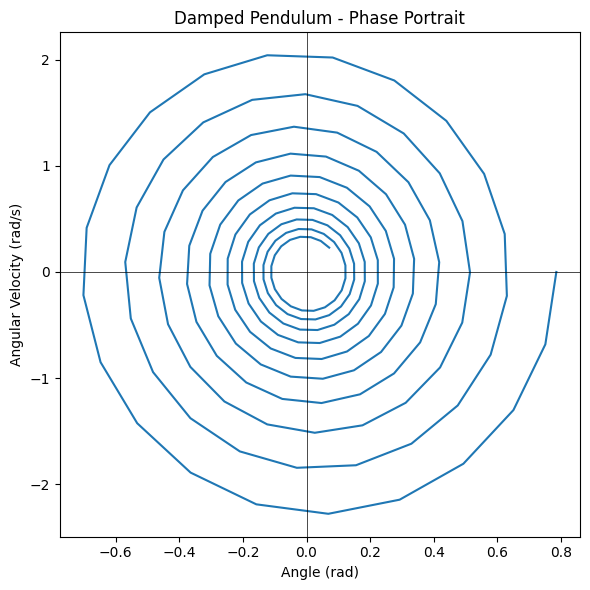

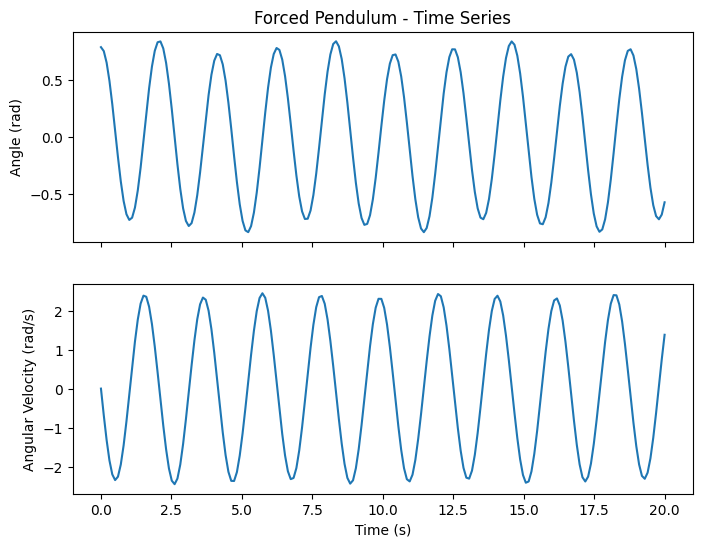

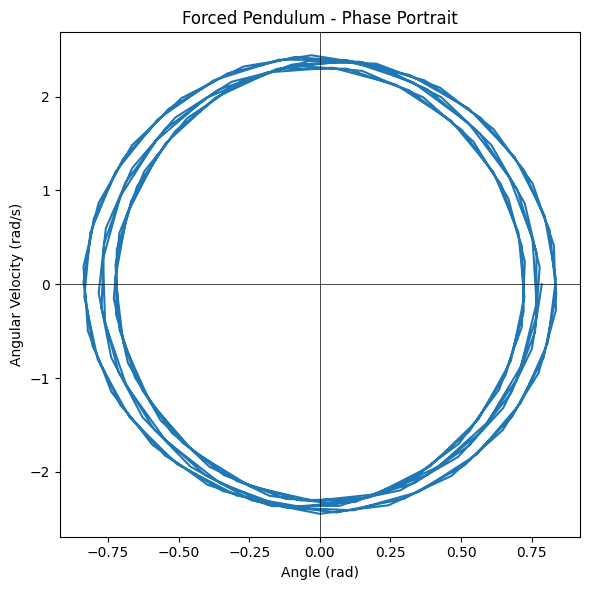

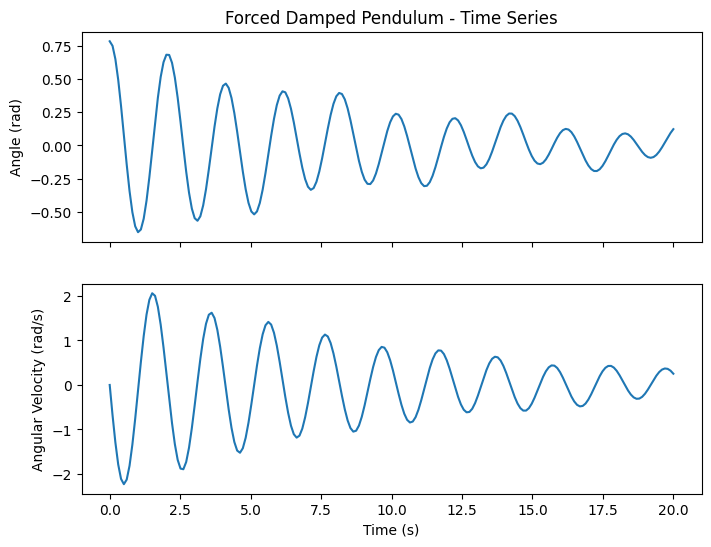

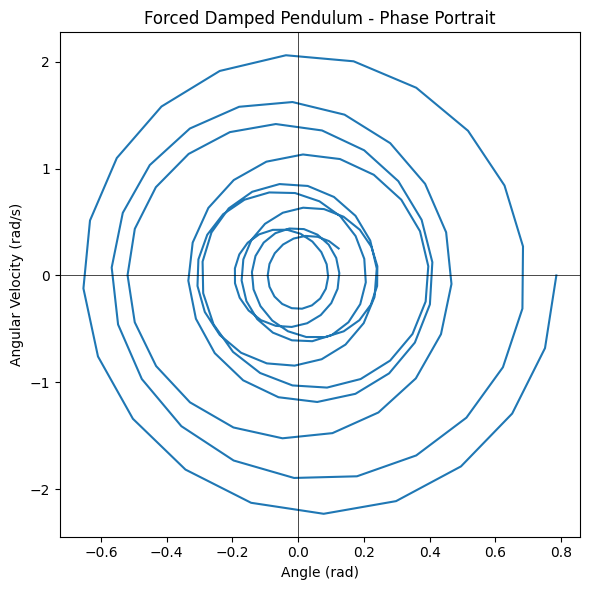

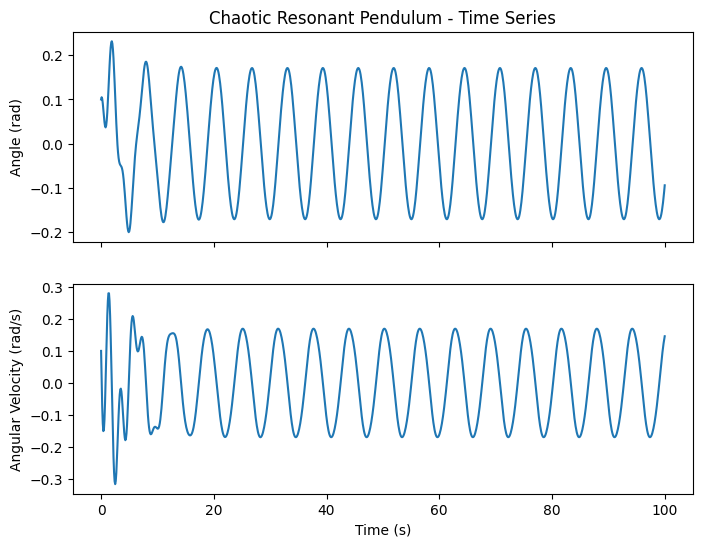

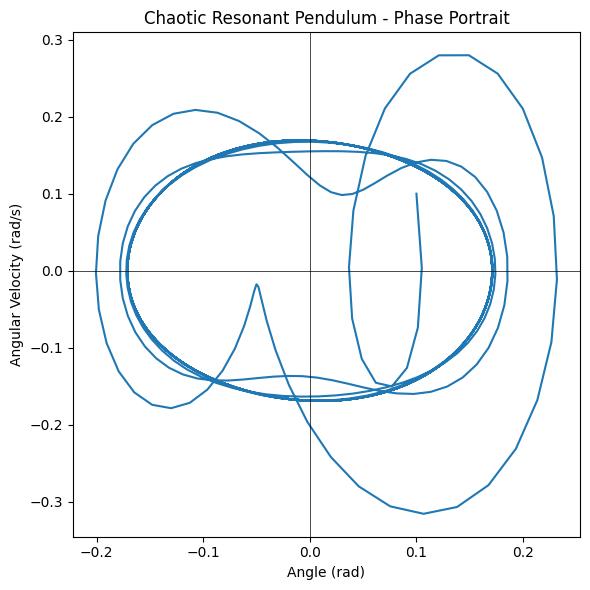

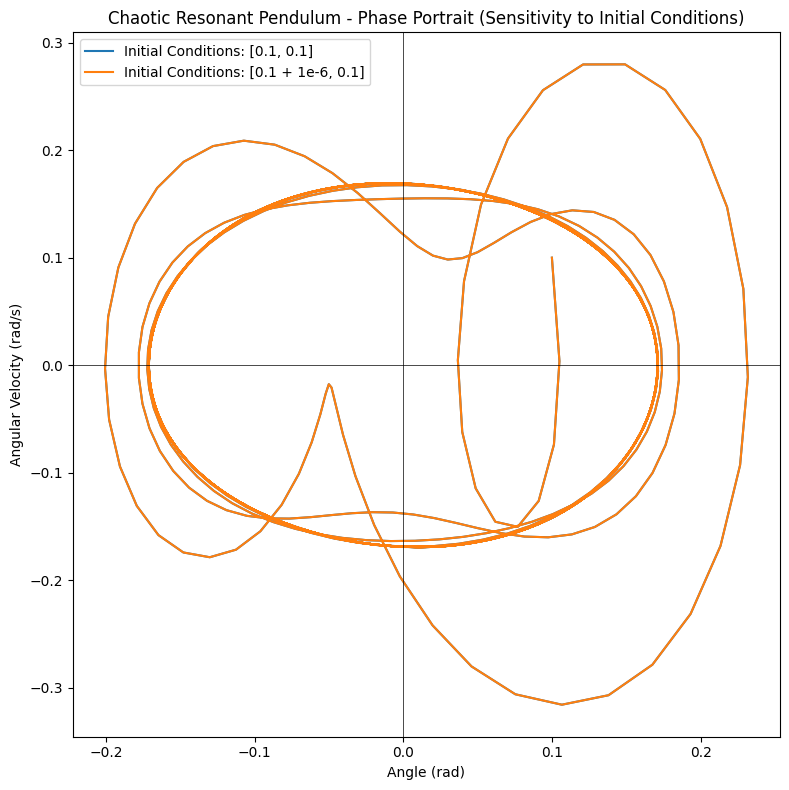

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- Simple Pendulum ---
def simple_pendulum(t, y, L, g):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

def plot_pendulum(t_sol, y_sol, title):
    theta = y_sol[0]
    omega = y_sol[1]

    fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    axs[0].plot(t_sol, theta)
    axs[0].set_ylabel('Angle (rad)')
    axs[0].set_title(f'{title} - Time Series')
    axs[1].plot(t_sol, omega)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Angular Velocity (rad/s)')

    fig_phase, ax_phase = plt.subplots(figsize=(6, 6))
    ax_phase.plot(theta, omega)
    ax_phase.set_xlabel('Angle (rad)')
    ax_phase.set_ylabel('Angular Velocity (rad/s)')
    ax_phase.set_title(f'{title} - Phase Portrait')
    ax_phase.axhline(0, color='k', linewidth=0.5)
    ax_phase.axvline(0, color='k', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Parameters for simple pendulum
L_simple = 1.0  # Length of pendulum (m)
g_simple = 9.81 # Acceleration due to gravity (m/s^2)
t_span = (0, 20)
t_eval = np.linspace(t_span[0], t_span[1], 200)
initial_conditions_simple = [np.pi/4, 0] # Initial angle, initial angular velocity

sol_simple = solve_ivp(simple_pendulum, t_span, initial_conditions_simple,
                       t_eval=t_eval, args=(L_simple, g_simple))
plot_pendulum(sol_simple.t, sol_simple.y, "Simple Pendulum")

# --- Damped Pendulum ---
def damped_pendulum(t, y, L, g, b):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta) - (b/1) * omega # Assuming mass m=1
    return [dtheta_dt, domega_dt]

# Parameters for damped pendulum
L_damped = 1.0
g_damped = 9.81
b_damped = 0.2 # Damping coefficient
initial_conditions_damped = [np.pi/4, 0]

sol_damped = solve_ivp(damped_pendulum, t_span, initial_conditions_damped,
                        t_eval=t_eval, args=(L_damped, g_damped, b_damped))
plot_pendulum(sol_damped.t, sol_damped.y, "Damped Pendulum")

# --- Forced Pendulum ---
def forced_pendulum(t, y, L, g, A, omega_f):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta) + A * np.sin(omega_f * t)
    return [dtheta_dt, domega_dt]

# Parameters for forced pendulum
L_forced = 1.0
g_forced = 9.81
A_forced = 0.5 # Amplitude of forcing
omega_f_forced = 1.0 # Frequency of forcing
initial_conditions_forced = [np.pi/4, 0]

sol_forced = solve_ivp(forced_pendulum, t_span, initial_conditions_forced,
                        t_eval=t_eval, args=(L_forced, g_forced, A_forced, omega_f_forced))
plot_pendulum(sol_forced.t, sol_forced.y, "Forced Pendulum")

# --- Forced Damped Pendulum ---
def forced_damped_pendulum(t, y, L, g, b, A, omega_f):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta) - (b/1) * omega + A * np.sin(omega_f * t)
    return [dtheta_dt, domega_dt]

# Parameters for forced damped pendulum
L_forced_damped = 1.0
g_forced_damped = 9.81
b_forced_damped = 0.2
A_forced_damped = 0.5
omega_f_forced_damped = 1.0
initial_conditions_forced_damped = [np.pi/4, 0]

sol_forced_damped = solve_ivp(forced_damped_pendulum, t_span, initial_conditions_forced_damped,
                               t_eval=t_eval, args=(L_forced_damped, g_forced_damped,
                                                    b_forced_damped, A_forced_damped,
                                                    omega_f_forced_damped))
plot_pendulum(sol_forced_damped.t, sol_forced_damped.y, "Forced Damped Pendulum")

# --- Chaotic Resonant Pendulum (Example of parameters that can lead to chaos) ---
def chaotic_resonant_pendulum(t, y, L, g, b, A, omega_f):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta) - (b/1) * omega + A * np.sin(omega_f * t)
    return [dtheta_dt, domega_dt]

# Parameters for chaotic resonant pendulum (these values are often cited in literature)
L_chaotic = 1.0
g_chaotic = 9.81
b_chaotic = 0.5
A_chaotic = 1.5
omega_f_chaotic = 1.0
initial_conditions_chaotic = [0.1, 0.1] # Small initial conditions

t_span_chaotic = (0, 100) # Longer time span to observe chaotic behavior
t_eval_chaotic = np.linspace(t_span_chaotic[0], t_span_chaotic[1], 1000)

sol_chaotic = solve_ivp(chaotic_resonant_pendulum, t_span_chaotic, initial_conditions_chaotic,
                         t_eval=t_eval_chaotic, args=(L_chaotic, g_chaotic, b_chaotic,
                                                     A_chaotic, omega_f_chaotic),
                         dense_output=True) # For smoother phase portrait

plot_pendulum(sol_chaotic.t, sol_chaotic.y, "Chaotic Resonant Pendulum")

# To observe the sensitivity to initial conditions, you can run another simulation
# with slightly different initial conditions and plot both phase portraits.
initial_conditions_chaotic_perturbed = [0.1 + 1e-6, 0.1]
sol_chaotic_perturbed = solve_ivp(chaotic_resonant_pendulum, t_span_chaotic,
                                    initial_conditions_chaotic_perturbed,
                                    t_eval=t_eval_chaotic,
                                    args=(L_chaotic, g_chaotic, b_chaotic,
                                          A_chaotic, omega_f_chaotic),
                                    dense_output=True)

plt.figure(figsize=(8, 8))
plt.plot(sol_chaotic.y[0], sol_chaotic.y[1], label='Initial Conditions: [0.1, 0.1]')
plt.plot(sol_chaotic_perturbed.y[0], sol_chaotic_perturbed.y[1], label='Initial Conditions: [0.1 + 1e-6, 0.1]')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Chaotic Resonant Pendulum - Phase Portrait (Sensitivity to Initial Conditions)')
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()